In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Exploración de datos

In [4]:
df = pd.read_csv('/content/Gun Price Prediction.csv')
df.head()

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
0,5,3.0,800,600,1500
1,4,3.2,810,620,1800
2,3,3.1,820,630,1600
3,6,3.3,830,640,1700
4,2,2.9,790,590,1400


In [5]:
df.shape

(100, 5)

In [8]:
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print(numeric_vars)
print(categorical_vars)

['Age (in years)', 'Weight (in kg)', 'Muzzle Velocity (m/s)', 'Max Range (m)', 'Price (in $)']
[]


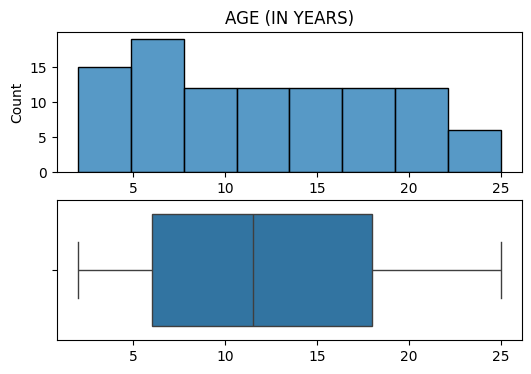

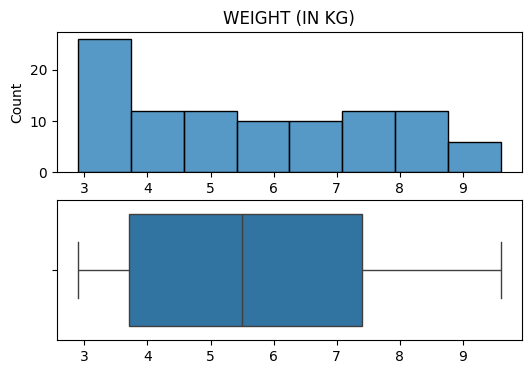

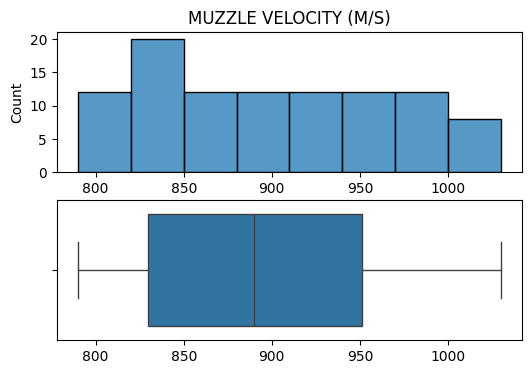

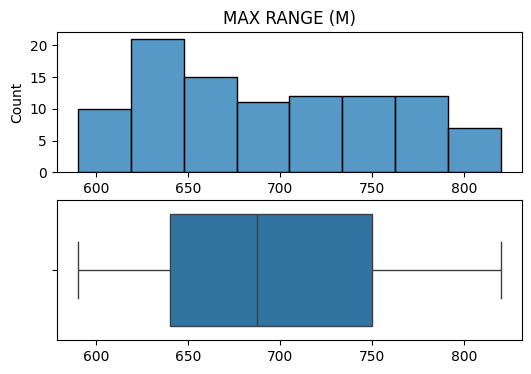

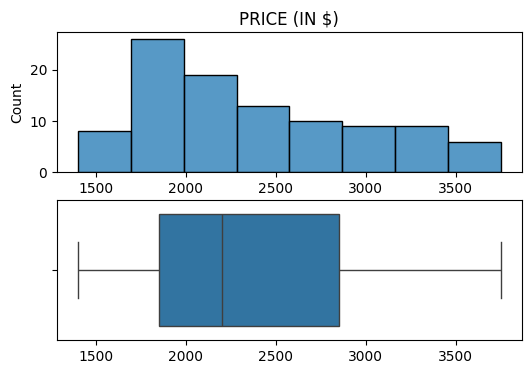

In [9]:
for i, col in enumerate(numeric_vars):
  fig, axes = plt.subplots(2, 1, figsize=(6, 4))
  sns.histplot(df[col], ax=axes[0])
  axes[0].set_title(col.upper())
  axes[0].set_xlabel('')
  sns.boxplot(x=df[col], ax=axes[1])
  axes[1].set_xlabel('')
  plt.show()

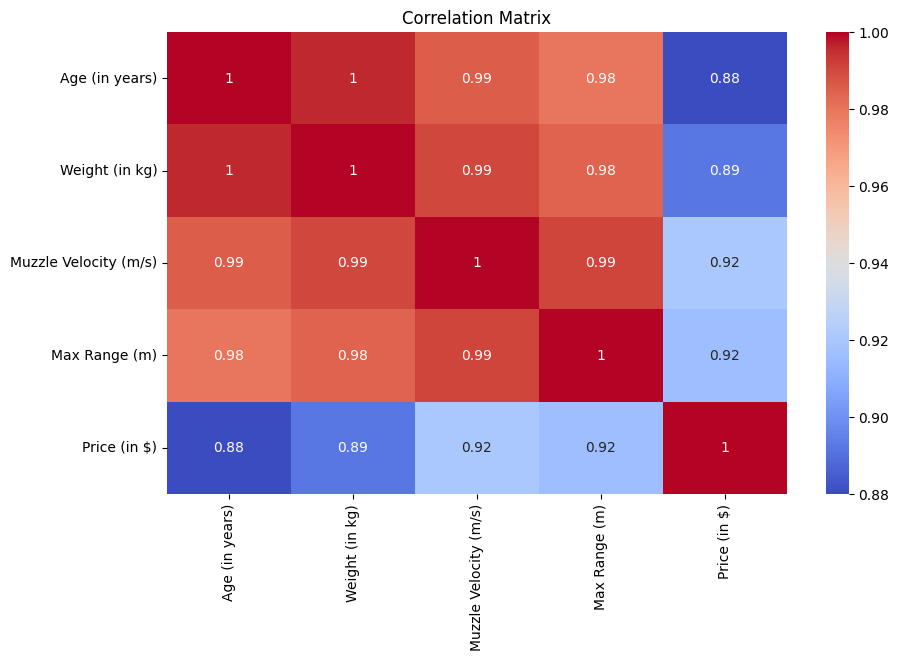

                       Age (in years)  Weight (in kg)  Muzzle Velocity (m/s)  \
Age (in years)                   1.00            1.00                   0.99   
Weight (in kg)                   1.00            1.00                   0.99   
Muzzle Velocity (m/s)            0.99            0.99                   1.00   
Max Range (m)                    0.98            0.98                   0.99   
Price (in $)                     0.88            0.89                   0.92   

                       Max Range (m)  Price (in $)  
Age (in years)                  0.98          0.88  
Weight (in kg)                  0.98          0.89  
Muzzle Velocity (m/s)           0.99          0.92  
Max Range (m)                   1.00          0.92  
Price (in $)                    0.92          1.00  


In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix.round(2))

In [16]:
df.describe()

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
count,100.00000,100.000000,100.00000,100.000000,100.000000
mean,12.02000,5.656000,895.60000,693.700000,2376.000000
std,6.60881,1.980374,67.95453,64.340555,616.706796
min,2.00000,2.900000,790.00000,590.000000,1400.000000
25%,6.00000,3.700000,830.00000,640.000000,1850.000000
50%,11.50000,5.500000,890.00000,687.500000,2200.000000
75%,18.00000,7.400000,951.25000,750.000000,2850.000000
max,25.00000,9.600000,1030.00000,820.000000,3750.000000


In [19]:
df.isnull().sum()

Age (in years)           0
Weight (in kg)           0
Muzzle Velocity (m/s)    0
Max Range (m)            0
Price (in $)             0
dtype: int64

In [20]:
df.dtypes

Age (in years)             int64
Weight (in kg)           float64
Muzzle Velocity (m/s)      int64
Max Range (m)              int64
Price (in $)               int64
dtype: object

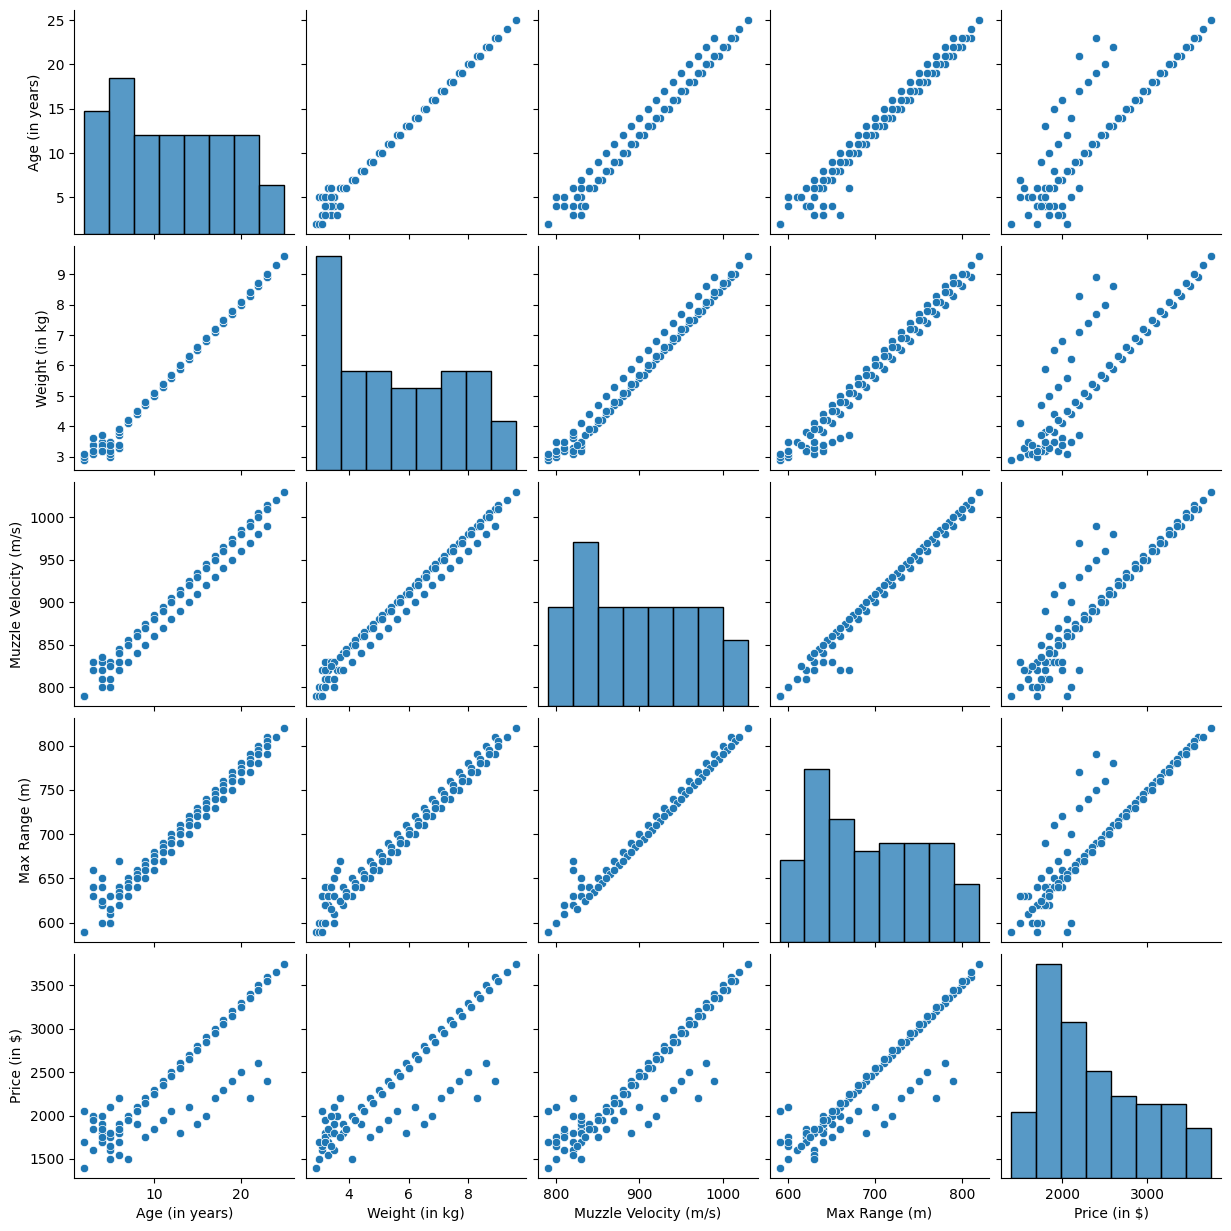

In [22]:
sns.pairplot(df)

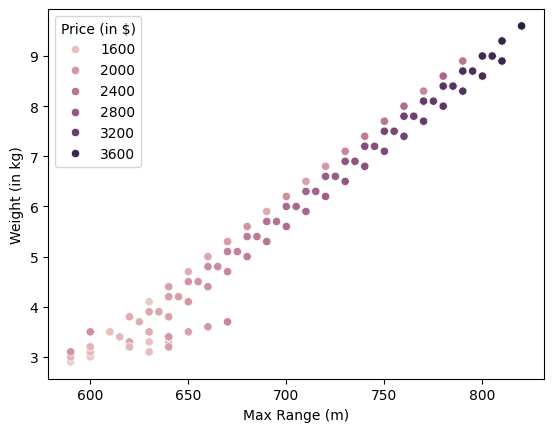

In [24]:
sns.scatterplot(x='Max Range (m)', y='Weight (in kg)', data=df, hue='Price (in $)')
plt.show()

Ideas del proceso de Exploración:
1. Se observa que el dataset cuenta con 100 registros y 5 variables asociadas al precio de un arma
2. Todas las variables se encuentran en formato numérico por lo que no es necesario realizar OneHotEncoding
3. No se observan datos nulos por lo que no es necesario realizar imputación
4. Se visualiza que todas las variables tienen una correlación alta.
5. Existe una relación lineal positiva entre el peso y el rango máximo respecto al precio.

# Modelo

In [39]:
X = df[['Age (in years)', 'Weight (in kg)', 'Muzzle Velocity (m/s)', 'Max Range (m)']]
y = df['Price (in $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MAE: 151.17026390043617
MSE: 46642.74909705471
RMSE: 215.96932443533436
R^2: 0.880853824389668


In [48]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)
print('KNN MAE:', mean_absolute_error(y_test, knn_model.predict(X_test)))
print('KNN RMSE:', np.sqrt(mean_squared_error(y_test, knn_model.predict(X_test))))
print('KNN R2 Score:', r2_score(y_test, knn_model.predict(X_test)))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.7920430880057796
KNN MAE: 154.0364345875725
KNN RMSE: 197.86351000981276
KNN R2 Score: 0.8999936941224771


In [51]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_random_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_random_forest.fit(X_train, y_train)
print('Best Parameters:', grid_search_random_forest.best_params_)
print('Best Score:', grid_search_random_forest.best_score_)

random_forest_model = grid_search_random_forest.best_estimator_
random_forest_model.fit(X_train, y_train)
print('Random Forest MAE:', mean_absolute_error(y_test, random_forest_model.predict(X_test)))
print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, random_forest_model.predict(X_test))))
print('Random Forest R2 Score:', r2_score(y_test, random_forest_model.predict(X_test)))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.7540125178506438
Random Forest MAE: 173.84860543459803
Random Forest RMSE: 214.5431234129351
Random Forest R2 Score: 0.8824222445781266


- Al observar los resultados mejor modelo fue el de KNeighborsRegressor.
- Este modelo es un candidato para salida a producción, sin embargo el dataset es corto y se requiere de un volumen mayor de datos para tener una mejor confianza.